### Load libraries, functions, palette, theme

In [1]:
import os
from pathlib import Path

In [2]:
current_path = os.getcwd()
main_path = str(Path(current_path).parent)

os.chdir(main_path)

# load functions
from functions import *
clear_output()

# load libraries and palette
%run libraries.ipynb

# load regions data
%run regions_data.ipynb

os.chdir(current_path)

In [3]:
# start stopwatch
start = stopwatch_start()

### Variables

In [4]:
dir = '005.1-005.2_SOL-Income-structure'

In [5]:
dir_load_files = main_path + '/files/01-Datasets/'

In [6]:
dir_save_data = main_path + '/files/01-Datasets/'

In [7]:
dir_save_excel = main_path + '/files/02-Excel-data/'

### Load Data

In [8]:
economics_data = loadit('economics_data', dir=dir_load_files)

# <font color='#2C8B6D'>I. Население</font>

# Section III. Уровень жизни

## 5. Распределение доходов населения

### 5.1. Распределение населения по интервальным группам среднедушевых денежных доходов

*Источник: https://rosstat.gov.ru/folder/13397*  
*Единицы измерения: проценты*

*Примечания:*

In [7]:
indexes = np.arange(0, 100, 12.5)

##### Data

In [8]:
income_structure_link = \
    ('data/02-Population/02-Standard-of-living/03-Income-structure/'
     'Urov_31.xlsx')

In [9]:
income_structure = pd.DataFrame(
    index=indexes
)

In [10]:
years_list = []
for i in range(1995, 2003):
    years_list.append(f'РФ {i}')

In [11]:
years_list.extend([
    'РФ 2006', 'РФ 2012'
])

In [12]:
for i in years_list:
    income_structure_ = pd.read_excel(income_structure_link, sheet_name=i)
    income_structure_ = transform_cut_rows(income_structure_, 4, 0)
    income_structure_ = income_structure_.set_index(indexes)
    income_structure_ = income_structure_[income_structure_.columns[1]]
    income_structure_.name = i[-4:]
    income_structure = pd.concat([income_structure, income_structure_], axis=1)

In [13]:
income_structure

,1995,1996,1997,1998,1999,2000,2001,2002,2006,2012
0.0,1.5,13.9,10.3,15.0,7,12.5,12.5,6.8,4.2,5.7
12.5,11.9,11.9,14.3,18.3,12.5,12,15,10.6,16.3,6.8
25.0,17.9,17.6,14.5,16.6,14.1,15.8,14.4,11.8,17.8,12
37.5,16.8,14.5,12.5,13.1,13,16.4,12.1,21,14.7,15.3
50.0,13.4,14,10.2,9.7,10.9,12.1,9.7,15.2,11.3,15.5
62.5,10.1,9.3,14.3,12.2,15.9,14.7,13.4,10.4,17.1,16.7
75.0,12.8,8.2,14,6.5,15.8,7.4,10.9,11.9,8.3,17.2
87.5,15.6,10.6,9.9,8.6,10.8,9.1,12,12.3,10.3,10.8


In [14]:
years_list1 = [
    'РФ 2003-2005', 'РФ 2007-2008', 'РФ 2009-2011'
]

In [15]:
for i in years_list1:
    income_structure_ = pd.read_excel(income_structure_link, sheet_name=i)
    income_structure_ = transform_cut_rows(income_structure_, 4, 0)
    income_structure_ = income_structure_.set_index(indexes)
    income_structure_ = income_structure_[income_structure_.columns[1:-2]]
    income_structure_.columns = range(int(i[3:7]), int(i[-4:])+1)
    income_structure = pd.concat([income_structure, income_structure_], axis=1)

In [16]:
years_list2 = [
    'РФ 2013-2022'
]

In [17]:
for i in years_list2:
    income_structure_ = pd.read_excel(income_structure_link, sheet_name=i)
    income_structure_ = transform_cut_rows(income_structure_, 4, 8)
    income_structure_ = income_structure_.set_index(indexes)
    income_structure_ = income_structure_[income_structure_.columns[1:-2]]
    income_structure_.columns = range(int(i[3:7]), int(i[-4:])+1)
    income_structure = pd.concat([income_structure, income_structure_], axis=1)

##### Manage columns

In [18]:
# all columns to string
income_structure.columns = [int(i) for i in income_structure.columns]

In [19]:
income_columns = [int(i) for i in income_structure.columns.tolist()]

In [20]:
income_columns.sort()

##### <font color='#2A5899'> Check for Discrepancy: Income Structure </font>

In [21]:
income_structure.iloc[:, :15]

,1995,1996,1997,1998,1999,2000,2001,2002,2006,2012,2003,2004,2005,2007,2008
0.0,1.5,13.9,10.3,15.0,7,12.5,12.5,6.8,4.2,5.7,9.9,6.2,3.2,2.6,1.5
12.5,11.9,11.9,14.3,18.3,12.5,12,15,10.6,16.3,6.8,17.4,13.2,8.8,11.8,8.4
25.0,17.9,17.6,14.5,16.6,14.1,15.8,14.4,11.8,17.8,12,16.7,14.4,11.3,14.8,12.2
37.5,16.8,14.5,12.5,13.1,13,16.4,12.1,21,14.7,15.3,13.4,12.8,11.3,13.6,12.3
50.0,13.4,14,10.2,9.7,10.9,12.1,9.7,15.2,11.3,15.5,14.3,15.0,14.8,11.3,11
62.5,10.1,9.3,14.3,12.2,15.9,14.7,13.4,10.4,17.1,16.7,11.5,13.4,14.8,19.1,20.2
75.0,12.8,8.2,14,6.5,15.8,7.4,10.9,11.9,8.3,17.2,10.2,13.7,17.4,16.6,19.8
87.5,15.6,10.6,9.9,8.6,10.8,9.1,12,12.3,10.3,10.8,6.6,11.3,18.4,10.2,14.6


In [22]:
income_structure.iloc[:, 15:]

,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0.0,5.3,3.8,2.8,9.8,8.2,6.2,5.9,5.4,5.0,4.1,3.5,2.7,1.4
12.5,7.0,5.6,4.5,10.5,9.5,8.0,7.8,7.3,6.8,6.0,5.6,4.5,3
25.0,10.9,9.4,8.1,14.3,13.5,12.3,12,11.5,11.0,10.1,9.6,8.3,6.2
37.5,15.9,14.6,13.4,15.3,15.1,14.5,14.3,14.1,13.6,13.0,12.8,11.5,9.7
50.0,20.4,20.2,19.8,17.5,17.9,18.2,18.2,18.2,18.0,17.8,17.9,17.1,16.1
62.5,21.9,23.5,24.8,19.3,20.6,22.4,22.8,23.3,23.7,24.6,25.3,25.9,27.4
75.0,9.3,10.8,12.1,6.4,7.2,8.3,8.5,8.9,9.4,10.2,10.6,11.7,13.5
87.5,9.3,12.1,14.5,6.9,8.0,10.1,10.5,11.3,12.5,14.2,14.7,18.3,22.7


##### <font color='#2A5899'> Final Results: Income Structure </font>

In [23]:
income_structure

,1995,1996,1997,1998,1999,2000,2001,2002,2006,2012,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0.0,1.5,13.9,10.3,15.0,7,12.5,12.5,6.8,4.2,5.7,...,9.8,8.2,6.2,5.9,5.4,5.0,4.1,3.5,2.7,1.4
12.5,11.9,11.9,14.3,18.3,12.5,12,15,10.6,16.3,6.8,...,10.5,9.5,8.0,7.8,7.3,6.8,6.0,5.6,4.5,3
25.0,17.9,17.6,14.5,16.6,14.1,15.8,14.4,11.8,17.8,12,...,14.3,13.5,12.3,12,11.5,11.0,10.1,9.6,8.3,6.2
37.5,16.8,14.5,12.5,13.1,13,16.4,12.1,21,14.7,15.3,...,15.3,15.1,14.5,14.3,14.1,13.6,13.0,12.8,11.5,9.7
50.0,13.4,14,10.2,9.7,10.9,12.1,9.7,15.2,11.3,15.5,...,17.5,17.9,18.2,18.2,18.2,18.0,17.8,17.9,17.1,16.1
62.5,10.1,9.3,14.3,12.2,15.9,14.7,13.4,10.4,17.1,16.7,...,19.3,20.6,22.4,22.8,23.3,23.7,24.6,25.3,25.9,27.4
75.0,12.8,8.2,14,6.5,15.8,7.4,10.9,11.9,8.3,17.2,...,6.4,7.2,8.3,8.5,8.9,9.4,10.2,10.6,11.7,13.5
87.5,15.6,10.6,9.9,8.6,10.8,9.1,12,12.3,10.3,10.8,...,6.9,8.0,10.1,10.5,11.3,12.5,14.2,14.7,18.3,22.7


In [24]:
dta = income_structure.iloc[-1]

In [25]:
dta.head()

1995    15.6
1996    10.6
1997     9.9
1998     8.6
1999    10.8
Name: 87.5, dtype: object

<Axes: ylabel='87.5'>

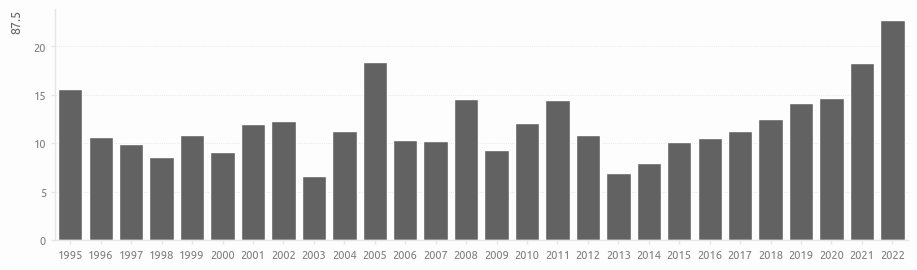

In [26]:
plt.figure(figsize=(11,3))
sns.barplot(dta)

<Axes: ylabel='87.5'>

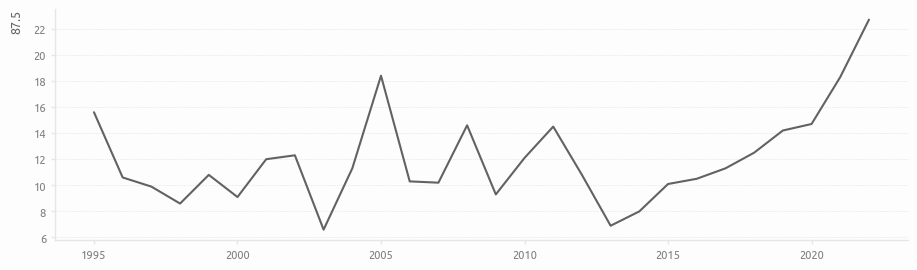

In [27]:
plt.figure(figsize=(11, 3))
sns.lineplot(dta)

##### <font color='#AF4035'> Export Dataset to Excel

In [28]:
saveit_excel(
    data=income_structure,
    filename=dir,
    path=save_excel,
    sheet='Распределение доходов'
)

'Распределение доходов' sheet created if file '010203-SOL-Income-structure.xlsx'


### 5.2. Распределение общего объема денежных доходов по 20-ти процентным группам населения

*Источник: https://rosstat.gov.ru/folder/13397*  
*Единицы измерения: проценты*

*Примечания:*

##### Data

In [29]:
income_structure_perc_link = \
    ('data/02-Population/02-Standard-of-living/03-Income-structure/'
     'Urov_32.xlsx')

In [30]:
income_structure_perc = pd.read_excel(income_structure_perc_link, sheet_name='РФ 1992-2022')

In [31]:
income_structure_perc_names = [
    'Год', '-', 'Первая', 'Вторая', 'Третья', 'Четвертая', 'Пятая', '-', '-'
]

In [32]:
income_structure_perc.columns = income_structure_perc_names

In [33]:
income_structure_perc = transform_cut_rows(income_structure_perc, 2, 6)

In [34]:
income_structure_perc = income_structure_perc.drop('-', axis=1)

In [35]:
income_structure_perc['Год'] = \
    income_structure_perc['Год'].apply(lambda x: transform_replace(x, '1)', ''))

In [36]:
income_structure_perc.head()

,Год,Первая,Вторая,Третья,Четвертая,Пятая
2,1992,6,11.6,17.6,26.5,38.3
3,1993,5.1,9.4,14.9,23.8,46.8
4,1994,5.4,10.1,15.1,22.7,46.7
5,1995,6.1,10.8,15.2,21.6,46.3
6,1996,6.1,10.7,15.2,21.6,46.4


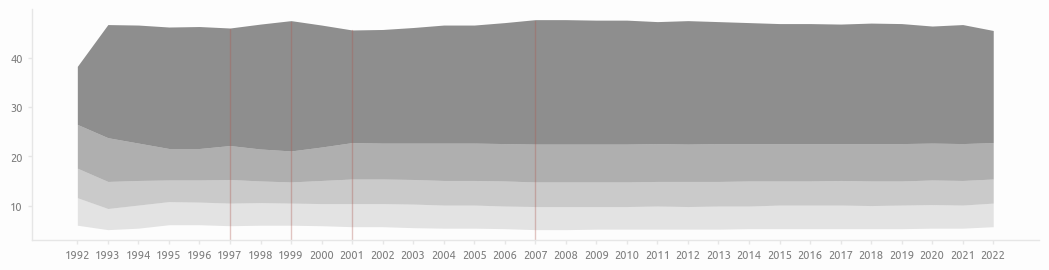


File successfully saved into 'analytics/visualization/'


In [40]:
alpha = 0.35
color = 1
group_list = ['Первая', 'Вторая', 'Третья', 'Четвертая', 'Пятая']
xticks = income_structure_perc['Год'].astype(int)
fig = plt.figure(figsize=(13, 3))
for i in range(len(group_list)-1):
    plt.fill_between(
        x=xticks,
        y1=income_structure_perc[group_list[i]].astype(float),
        y2=income_structure_perc[group_list[i+1]].astype(float),
        lw=0,
        color=palette[-color],
        alpha=alpha
    )
    plt.xticks(xticks, xticks)
    plt.grid(False)
    # plt.gca().xaxis.grid(True, color=palette[-1], alpha=0.75)
    alpha +=0.1
    color +=1
plt.axvline(x=1997, ymin=0, ymax=0.915, lw=1, alpha=0.35, color=palette[1])
plt.axvline(x=1999, ymin=0, ymax=0.945, lw=1, alpha=0.35, color=palette[1])
plt.axvline(x=2001, ymin=0, ymax=0.910, lw=1, alpha=0.35, color=palette[1])
plt.axvline(x=2007, ymin=0, ymax=0.950, lw=1, alpha=0.35, color=palette[1])
plt.show()

savefig('Income five groups 5.1', dir=save_plot_dir, dpi=300)

##### <font color='#AF4035'> Export Dataset to Excel

In [38]:
saveit_excel(
    data=income_structure_perc,
    filename=dir,
    path=save_excel,
    sheet='Распределение доходов (20%)'
)

'Распределение доходов (20%)' sheet created if file '010203-SOL-Income-structure.xlsx'


### Save Dataset

In [39]:
economics_data['5.1'] = income_structure

In [40]:
economics_data['5.2'] = income_structure_perc

In [41]:
saveit(
    file=economics_data,
    name='economics_data',
    dir=save_df
)

File 'economics_data' saved in directory 'data/00-Datasets/'


### Save Session

In [42]:
save_session(dir)

### Execution time

In [43]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:17
